In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Markdown, display
from openbb import obb
from sklearn.decomposition import PCA

In [2]:
obb.user.preferences.output_type = "dataframe"

date
2024-09-09 00:00:00    2297.244873
2024-09-09 00:01:00    2296.835449
2024-09-09 00:02:00    2298.236816
2024-09-09 00:03:00    2296.902100
2024-09-09 00:04:00    2296.503174
                          ...     
2024-09-13 16:50:00    2400.357422
2024-09-13 16:51:00    2399.018311
2024-09-13 16:52:00    2401.883057
2024-09-13 16:53:00    2405.727539
2024-09-13 16:54:00    2408.667969
Name: close, Length: 6671, dtype: float64

In [24]:
def get_cryoto_data(symbol, start_date=None, end_date=None):
    data = obb.crypto.price.historical(symbol=symbol, interval='1h', start_date='2024-07-01', end_date='2024-12-31', provider='yfinance')
    data["symbol"] = symbol
    return data

In [25]:
get_cryoto_data('BTC-USD').pivot(columns="symbol", values="close")

symbol,BTC-USD
date,
2024-07-01 00:00:00,62820.148438
2024-07-01 01:00:00,63531.328125
2024-07-01 02:00:00,63355.007812
2024-07-01 03:00:00,63351.429688
2024-07-01 04:00:00,63209.234375
...,...
2024-09-13 13:00:00,58122.230469
2024-09-13 14:00:00,58404.339844
2024-09-13 15:00:00,59621.039062


In [26]:
symbols = ["BTC-USD", "ETH-USD", "ADA-USD", "ALGO-USD", "LINK-USD", "XRP-USD", "BNB-USD", "SOL-USD"]

In [30]:
df_list = []

for sy in symbols:
    dat = get_cryoto_data(sy)
    df_list.append(dat)

In [31]:
df_list

[                             open          high           low         close  \
 date                                                                          
 2024-07-01 00:00:00  62673.605469  62820.148438  62510.226562  62820.148438   
 2024-07-01 01:00:00  62837.519531  63567.218750  62836.957031  63531.328125   
 2024-07-01 02:00:00  63529.867188  63700.453125  63259.527344  63355.007812   
 2024-07-01 03:00:00  63363.109375  63423.113281  63296.039062  63351.429688   
 2024-07-01 04:00:00  63354.839844  63360.101562  63182.468750  63209.234375   
 ...                           ...           ...           ...           ...   
 2024-09-13 13:00:00  57914.546875  58122.230469  57709.156250  58122.230469   
 2024-09-13 14:00:00  58061.285156  58434.023438  57920.335938  58404.339844   
 2024-09-13 15:00:00  58465.460938  59712.277344  58404.507812  59621.039062   
 2024-09-13 16:00:00  59674.445312  59778.175781  59338.382812  59476.136719   
 2024-09-13 17:00:00  59459.261719  5961

In [34]:
final_df = pd.concat(df_list)

final_df = final_df.pivot(columns="symbol", values="close")

In [35]:
returns = final_df.pct_change().dropna()


In [36]:
returns

symbol,ADA-USD,ALGO-USD,BNB-USD,BTC-USD,ETH-USD,LINK-USD,SOL-USD,XRP-USD
date,,,,,,,,
2024-07-01 01:00:00,0.014110,0.018693,0.009161,0.011321,0.022249,0.009295,0.003306,0.006876
2024-07-01 02:00:00,0.000452,0.001488,-0.003132,-0.002775,-0.004688,-0.005218,-0.007450,-0.002624
2024-07-01 03:00:00,0.001876,0.006006,0.000536,-0.000056,-0.000026,-0.002548,0.002949,0.001280
2024-07-01 04:00:00,-0.000775,0.000157,0.000467,-0.002245,-0.003649,0.004565,-0.001096,-0.000717
2024-07-01 05:00:00,-0.002938,0.000096,0.000182,0.002405,0.000585,0.000826,0.004062,0.000331
...,...,...,...,...,...,...,...,...
2024-09-13 13:00:00,0.003748,0.006980,0.006496,0.003327,0.001266,-0.006974,0.002150,-0.000459
2024-09-13 14:00:00,0.005437,0.004324,-0.005058,0.004854,0.003237,0.005881,0.007135,-0.000577
2024-09-13 15:00:00,0.022567,0.023273,0.007658,0.020832,0.017180,0.020957,0.021790,0.004022


In [37]:
pca = PCA(n_components=3)
pca.fit(returns)

PCA(n_components=3)

In [38]:
pct = pca.explained_variance_ratio_
pca_components = pca.components_

In [39]:
cum_pct = np.cumsum(pct)
x = np.arange(1, len(pct) + 1, 1)

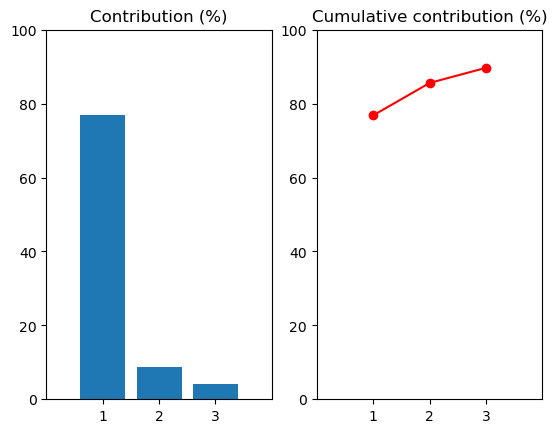

In [40]:
plt.subplot(1, 2, 1)
plt.bar(x, pct * 100, align="center")
plt.title("Contribution (%)")
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

plt.subplot(1, 2, 2)
plt.plot(x, cum_pct * 100, "ro-")
plt.title("Cumulative contribution (%)")
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

plt.show()

In [41]:
X = np.asarray(returns)
factor_returns = X.dot(pca_components.T)
factor_returns = pd.DataFrame(
    columns=["f1", "f2", "f3"], index=returns.index, data=factor_returns
)

In [42]:
display(factor_returns)


,f1,f2,f3
date,,,
2024-07-01 01:00:00,0.032868,-0.003163,-0.010371
2024-07-01 02:00:00,-0.008616,0.000963,-0.005455
2024-07-01 03:00:00,0.003766,0.000172,0.000346
2024-07-01 04:00:00,-0.000784,-0.000313,-0.002178
2024-07-01 05:00:00,0.002012,-0.001153,0.004564
...,...,...,...
2024-09-13 13:00:00,0.005316,-0.001905,0.000259
2024-09-13 14:00:00,0.009785,-0.003912,0.000735
2024-09-13 15:00:00,0.049921,-0.011969,-0.002988


In [43]:
factor_exposures = pd.DataFrame(
    index=["f1", "f2", "f3"], columns=returns.columns, data=pca_components
).T

In [44]:
display(factor_exposures)

,f1,f2,f3
symbol,,,
ADA-USD,0.375293,0.027076,-0.431787
ALGO-USD,0.379006,-0.129380,-0.322676
BNB-USD,0.299546,-0.086927,-0.001408
BTC-USD,0.272106,-0.128990,0.195136
ETH-USD,0.331452,-0.149993,-0.049654
LINK-USD,0.399319,-0.137104,-0.282929
SOL-USD,0.428758,-0.207697,0.758880
XRP-USD,0.313992,0.934826,0.113786


<Axes: xlabel='symbol'>

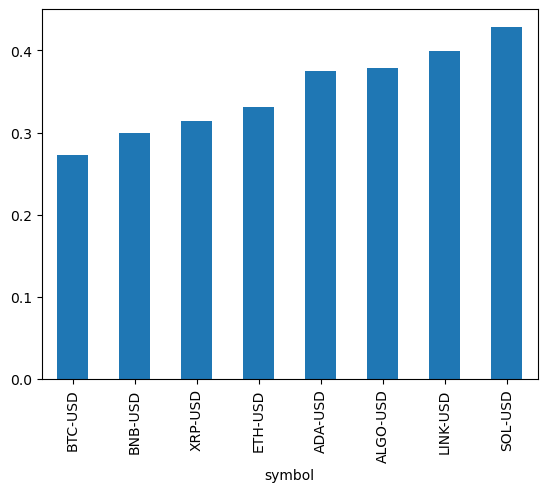

In [45]:
factor_exposures.f1.sort_values().plot.bar()


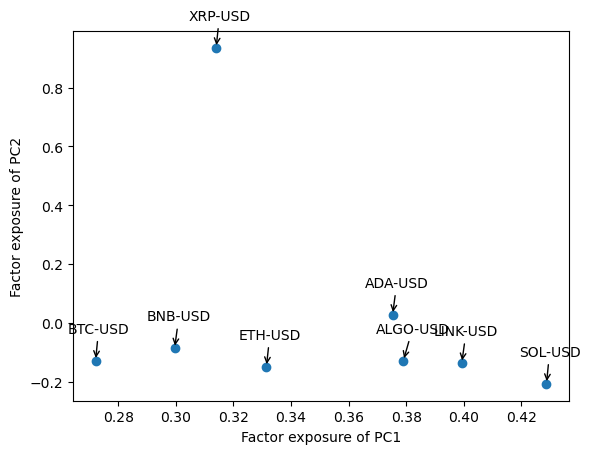

In [46]:
labels = factor_exposures.index
data = factor_exposures.values
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel("Factor exposure of PC1")
plt.ylabel("Factor exposure of PC2")

for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(-20, 20),
        textcoords="offset points",
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0"),
    )

plt.show()